In [1]:
import dca_frustratometer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Measure Frustration of Complete PDB

In [2]:
structure=dca_frustratometer.Structure.full_pdb('./data/1l63.pdb',"A")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=10)

@> 1442 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.02s.


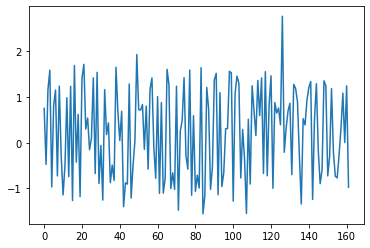

In [3]:
plt.plot(AWSEM_model.frustration(kind='singleresidue'))

In [4]:
print(AWSEM_model.native_energy())

-914.9406872711636


@> 1442 atoms and 1 coordinate set(s) were parsed in 0.01s.


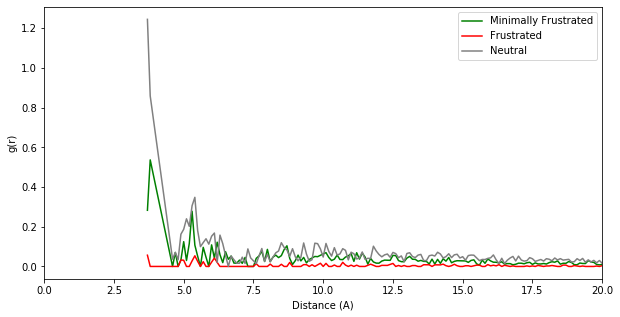

In [5]:
AWSEM_model.view_frustration_pair_distribution(kind="singleresidue")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
@> 1442 atoms and 1 coordinate set(s) were parsed in 0.02s.


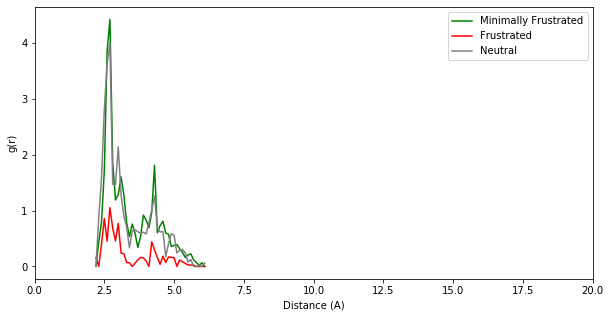

In [6]:
AWSEM_model.view_frustration_pair_distribution(kind="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


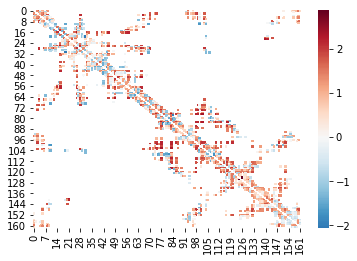

In [7]:
sns.heatmap(AWSEM_model.frustration(kind='mutational'),cmap='RdBu_r',center=0)

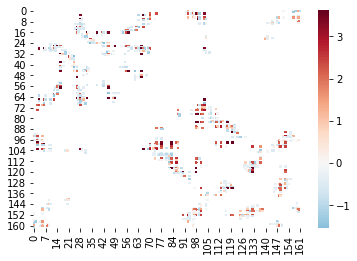

In [8]:
sns.heatmap(AWSEM_model.frustration(kind='contact'),cmap='RdBu_r',center=0)

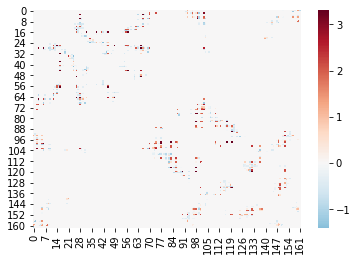

In [9]:
sns.heatmap(AWSEM_model.frustration(kind='contact',correction=0.1),cmap='RdBu_r',center=0)

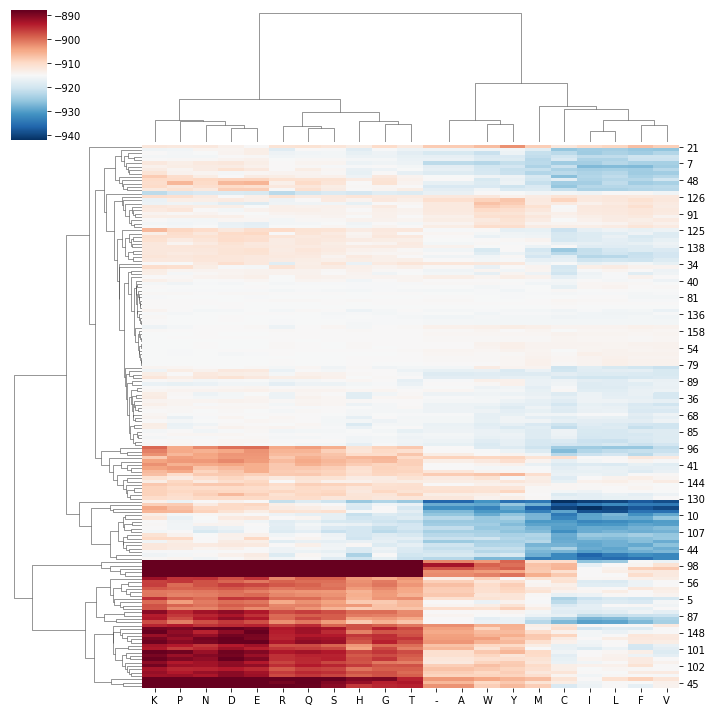

In [10]:
AWSEM_model.plot_decoy_energy(kind='singleresidue')

In [11]:
#sns.clustermap(model.decoy_energy('mutational').reshape(-1,21*21))

In [12]:
AWSEM_model.decoy_fluctuation(kind='singleresidue').mean()

2.306072535061518

In [13]:
AWSEM_model.decoy_fluctuation(kind='mutational').mean()

0.5644128240022258

In [14]:
AWSEM_model.decoy_fluctuation(kind='contact').mean()

0.018060075284395877

In [15]:
AWSEM_model.view_frustration()


/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:134: RuntimeWarning: invalid value encountered in greater
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] > 1]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:135: RuntimeWarning: invalid value encountered in less
  frustrated = sel_frustration[sel_frustration[:, -1] < -.78]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Compare Lammps AWSEM and DCA Frustratometer Frustration Values

## Cyclophilin A (PDB: 6U5E)

In [16]:
structure=dca_frustratometer.Structure.full_pdb('./data/6U5E_A.pdb',"A")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=10)
#Calculate mutational frustation
frustratometer_mutational_frustration=AWSEM_model.frustration(kind="mutational")

@> 2471 atoms and 1 coordinate set(s) were parsed in 0.09s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2475
  PDBConstructionWarning,
@> 2471 atoms and 1 coordinate set(s) were parsed in 0.03s.
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


@> 2471 atoms and 1 coordinate set(s) were parsed in 0.02s.


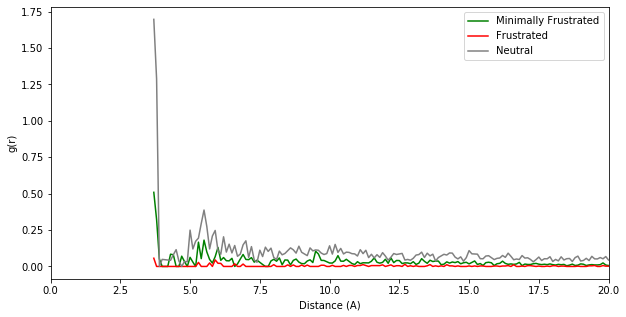

In [17]:
AWSEM_model.view_frustration_pair_distribution(kind="singleresidue")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
@> 2471 atoms and 1 coordinate set(s) were parsed in 0.03s.


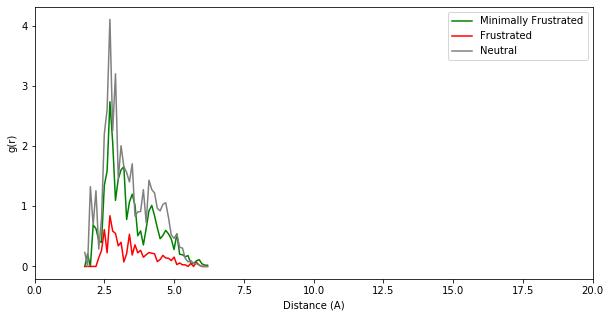

In [18]:
AWSEM_model.view_frustration_pair_distribution(kind="mutational")

In [19]:
#Import Lammps AWSEM mutational frustration values
lammps_mutational_frustration_dataframe=pd.read_csv("./data/6U5E_A_tertiary_frustration.dat",header=0,sep="\s+")

lammps_mutational_frustration=np.full((163, 163), np.nan)
for index,row in lammps_mutational_frustration_dataframe.iterrows():
    lammps_mutational_frustration[row.i-1,row.j-1]=row.f_ij
    lammps_mutational_frustration[row.j-1,row.i-1]=row.f_ij

In [20]:
merged_mutational_frustration=np.triu(lammps_mutational_frustration)+np.tril(frustratometer_mutational_frustration)

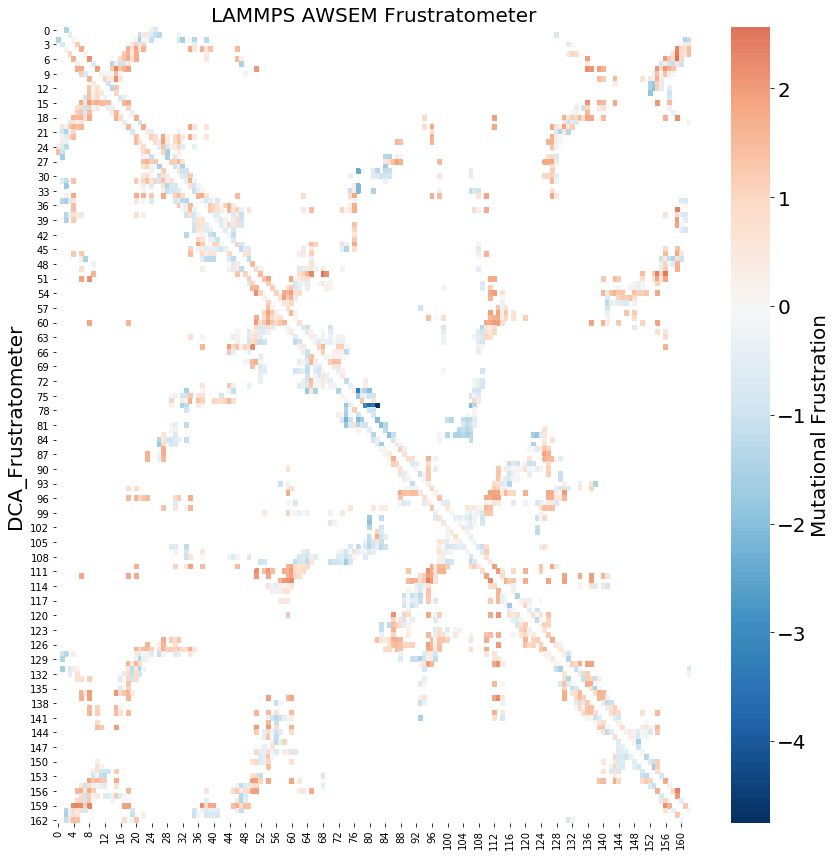

In [21]:
plt.figure(figsize=(12,12))

g=sns.heatmap(merged_mutational_frustration,cmap="RdBu_r",center=0,cbar_kws={'label': 'Mutational Frustration'})
g.set_title("LAMMPS AWSEM Frustratometer",fontsize=20)
g.set_ylabel("DCA_Frustratometer",fontsize=20)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
g.figure.axes[-1].yaxis.label.set_size(20)

plt.tight_layout()
plt.savefig("./data/6U5E_A_Lammps_AWSEM_vs_Frustratometer_Frustration_Comparison.png")

# Measure Frustration of PDB Segment

## Ribonuclease A (PDB: 1RNB)

In [22]:
#Use original pdb residue numbering when providing initial and final indices.
structure=dca_frustratometer.Structure.spliced_pdb('./data/1rnb.pdb',"A",seq_selection="resnum `2to23`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1721
  PDBConstructionWarning,
@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [23]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:134: RuntimeWarning: invalid value encountered in greater
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] > 1]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:135: RuntimeWarning: invalid value encountered in less
  frustrated = sel_frustration[sel_frustration[:, -1] < -.78]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Cytochrome C (PDB: 1CYC)

In [24]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1cyc.pdb',"A",seq_selection="resindex `0to50`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 1615 atoms and 1 coordinate set(s) were parsed in 0.01s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1619
  PDBConstructionWarning,
@> 1615 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [25]:
model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:134: RuntimeWarning: invalid value encountered in greater
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] > 1]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:135: RuntimeWarning: invalid value encountered in less
  frustrated = sel_frustration[sel_frustration[:, -1] < -.78]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## TIM (PDB: 1TIM)

In [ ]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1tim.pdb',"A",seq_selection="resindex `30to80`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

In [ ]:
model.view_frustration()

## Trypsin (PDB: 3PTN)

In [ ]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/3ptn.pdb',"A",seq_selection="resindex `40to65`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

In [ ]:
model.view_frustration()

## FGF (PDB: 1RG8)

In [ ]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1rg8.pdb',"A",seq_selection="resindex `10to55`")
model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

In [ ]:
model.view_frustration()